# Linear Regression

Predicting Y value

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


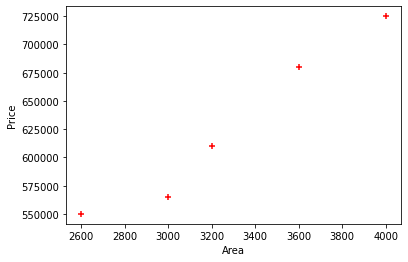

In [ ]:
%matplotlib inline
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
(reg.coef_,reg.intercept_)

(array([135.78767123]), 180616.43835616432)

In [ ]:
#y=mx+c
135.78767123*3300+180616.43835616432

628715.7534151643

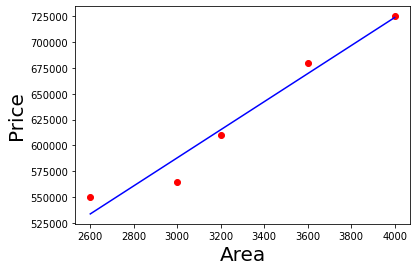

In [ ]:
%matplotlib inline
plt.xlabel("Area",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.scatter(df.area,df.price, color='red')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

Predicting multiple values

In [ ]:
df1= pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv")
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
p= reg.predict(df1)

In [ ]:
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
df1['Prices']=p

In [ ]:
df1

,area,Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
df1.to_csv("Prediction.csv")

Exercise
* Predict "Per capita Income" in year 2022

In [ ]:
d= pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")
d.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
d.columns=['year','pci']

In [ ]:
d.head()

,year,pci
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


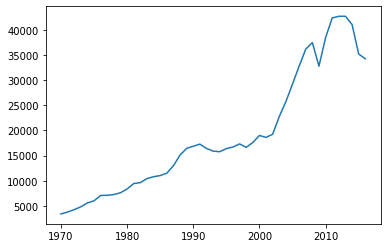

In [ ]:
%matplotlib inline
plt.plot(d.year,d.pci)

In [ ]:
reg= linear_model.LinearRegression()
reg.fit(d[['year']],d.pci)

LinearRegression()

In [ ]:
reg.predict([[2022]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42945.62424486])

Multivariate Regression

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv")

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
#Handling with NULL points
median= df.bedrooms.median()

In [ ]:
df.bedrooms= df.bedrooms.fillna(median)

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg= linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_, reg.intercept_

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.00186540396)

In [ ]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
(3000*112.06244194)+(3*23388.88007794)+(40*-3231.71790863)+221323.00186540396

498408.251574024

In [ ]:
reg.predict([[2500,4,5]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

Exercise

In [ ]:
hire= pd.read_csv('https://github.com/codebasics/py/raw/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
hire.isna().any()

experience                     True
test_score(out of 10)          True
interview_score(out of 10)    False
salary($)                     False
dtype: bool

In [ ]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=569a764af5399f6b34cb13860579bf2c2853ede5345a6628044bc9daa4726b09
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [ ]:
from word2number import w2n

In [ ]:
hire.experience= hire.experience.fillna('zero')
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
hire.experience= hire.experience.apply(w2n.word_to_num)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
median= hire['test_score(out of 10)'].median()
median

8.0

In [ ]:
hire['test_score(out of 10)']= hire['test_score(out of 10)'].fillna(median)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg= linear_model.LinearRegression()
reg.fit(hire[['experience','test_score(out of 10)','interview_score(out of 10)']],hire['salary($)'])

LinearRegression()

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

# Dummy Variables and One hot Encoding

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.read_csv("https://github.com/codebasics/py/raw/master/ML/5_one_hot_encoding/homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies= pd.get_dummies(df.town)

In [ ]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged= pd.concat([df,dummies], axis='columns')

In [ ]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [ ]:
final= merged.drop(['town','west windsor'],axis='columns')

In [ ]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
x= final.drop('price',axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [ ]:
y= final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression(
)
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.predict([[2800,0,1]]) #area= 2800, town= robinsville

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [ ]:
reg.predict([[3400,0,0]]) #area= 3400, town= west windsor

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [ ]:
reg.score(x,y)

0.9573929037221873

Using One Hot Encoder(sklearn)

In [ ]:
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
dfle= df
dfle.town= le.fit_transform(dfle.town)

In [ ]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
x= dfle[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
y= dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ohe= OneHotEncoder()
ct= ColumnTransformer([("town",ohe,[0])], remainder='passthrough')

In [ ]:
x= ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
x= x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [ ]:
reg.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

Exercise

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("https://github.com/codebasics/py/raw/master/ML/5_one_hot_encoding/Exercise/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
df.columns= ['Model','Mileage','SellPrice','Age']
df

,Model,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummies= pd.get_dummies(df.Model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
merged= pd.concat([df,dummies],axis='columns')

In [ ]:
merged

,Model,Mileage,SellPrice,Age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
final= merged.drop(['Model','Mercedez Benz C class'], axis='columns')
final

,Mileage,SellPrice,Age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [ ]:
x= final.drop(['SellPrice'],axis='columns')
x

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [ ]:
y= final['SellPrice']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: SellPrice, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.predict([[4500,4,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51981.26203334])

In [ ]:
reg.predict([[8600,7,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39728.19323785])

In [ ]:
reg.score(x,y)

0.9417050937281082

# Training & Testing

In [24]:
import pandas as pd
import numpy as np

In [26]:
df= pd.read_csv("https://github.com/codebasics/py/raw/master/ML/6_train_test_split/carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


Car Mileage vs Sell Price

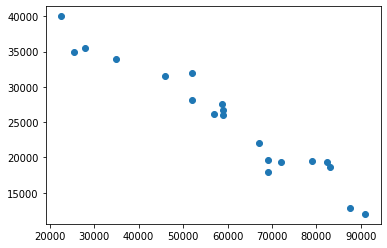

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Mileage'],df['Sell Price($)'])

Car Age vs Sell Price

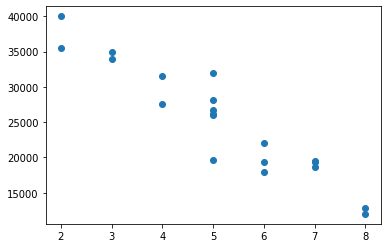

In [31]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [34]:
x= df.drop(['Sell Price($)'],axis='columns')
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [36]:
y= df.drop(x, axis='columns')
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [37]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2)

In [52]:
len(xtrain), len(xtest)

(16, 4)

In [53]:
xtrain

,Mileage,Age(yrs)
14,82450,7
3,22500,2
19,52000,5
7,72000,6
4,46000,4
2,57000,5
18,87600,8
12,59000,5
0,69000,6
16,28000,2


In [54]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()

In [55]:
clf.fit(xtrain,ytrain)

LinearRegression()

In [56]:
xtest

,Mileage,Age(yrs)
10,83000,7
13,58780,4
11,79000,7
8,91000,8


In [57]:
clf.predict(xtest)

array([[16179.27048095],
       [24782.36220987],
       [17828.97245163],
       [13341.8177741 ]])

In [58]:
clf.score(xtest,ytest)

0.8483261383509422